In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_fBiPot.recursive_LSTM_PostMeanScore_fBiPot_T256_H05_tl_110data import \
    get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
config = get_config()
deltaT = config.deltaT
print(config.loss_factor)
local_bw_rmses = {}
global_bw_rmses = {}

2


In [7]:
def plot_errors(config, Nepoch):
    if "_ST_" in config.scoreNet_trained_path:
        save_path = (
                project_config.ROOT_DIR + f"experiments/results/TSPM_LSTM_ST_fBiPot_DriftTrack_{Nepoch}Nep_{config.t0}t0_{config.deltaT:.3e}dT_{config.quartic_coeff}a_{config.quad_coeff}b_{config.const}c_{config.residual_layers}ResLay_{config.loss_factor}LFac").replace(
            ".", "")
    else:
        save_path = (
                project_config.ROOT_DIR + f"experiments/results/TSPM_LSTM_fBiPot_DriftTrack_{Nepoch}Nep_{config.t0}t0_{config.deltaT:.3e}dT_{config.quartic_coeff}a_{config.quad_coeff}b_{config.const}c_{config.residual_layers}ResLay_{config.loss_factor}LFac").replace(
            ".", "")

    true_states = np.load(save_path + "_global_true_states.npy")/np.sqrt(config.deltaT)
    local_states= np.load(save_path + "_local_states.npy")/np.sqrt(config.deltaT)
    local_errors = np.power(np.cumsum(np.mean(np.power(true_states- local_states,2), axis=0), axis=0), 0.5)
    fig, ax = plt.subplots(figsize=(14,9))
    total_local_errors = np.power(np.sum(np.power(local_errors, 2), axis=1)/np.arange(1, local_errors.shape[0]+1), 0.5)
    ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
    ax.set_title(f"Cumulative RMSE for LSTM Score Estimator",fontsize=40)
    ax.set_ylabel("RMSE", fontsize=38)
    ax.set_xlabel("Time Axis", fontsize=38)
    ax.tick_params(labelsize=38)
    plt.tight_layout()
    #if Nepoch == 1440:
        #plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/4DLnz_PM_LSTM_{Nepoch}Nep.png",  bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Final time cumulative RMSE local-time error {total_local_errors[-1]} at Nepoch {epoch}\n")


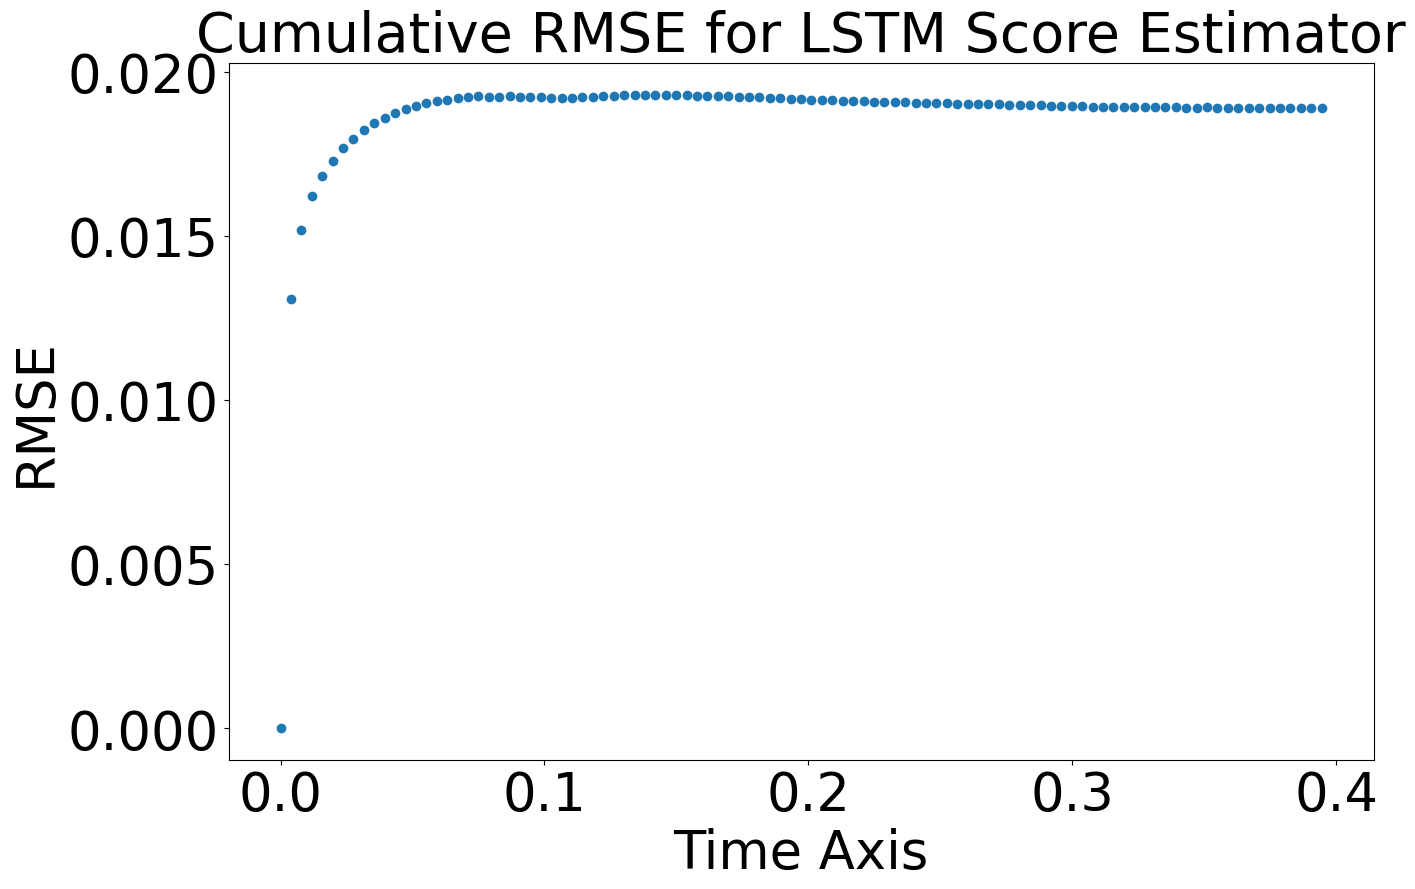

Final time cumulative RMSE local-time error 0.018877682200841527 at Nepoch 150



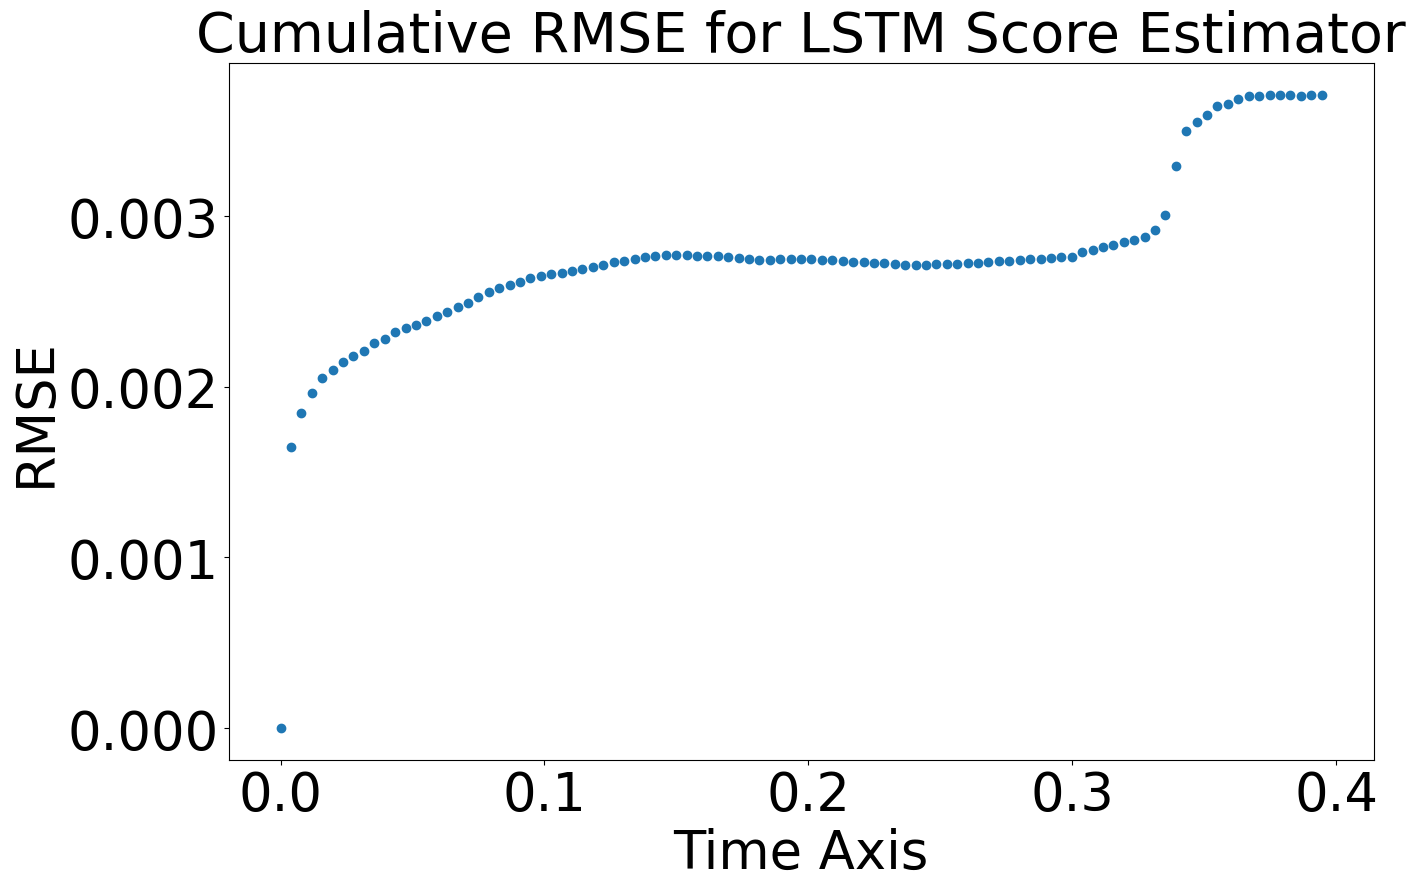

Final time cumulative RMSE local-time error 0.003710410846898672 at Nepoch 300



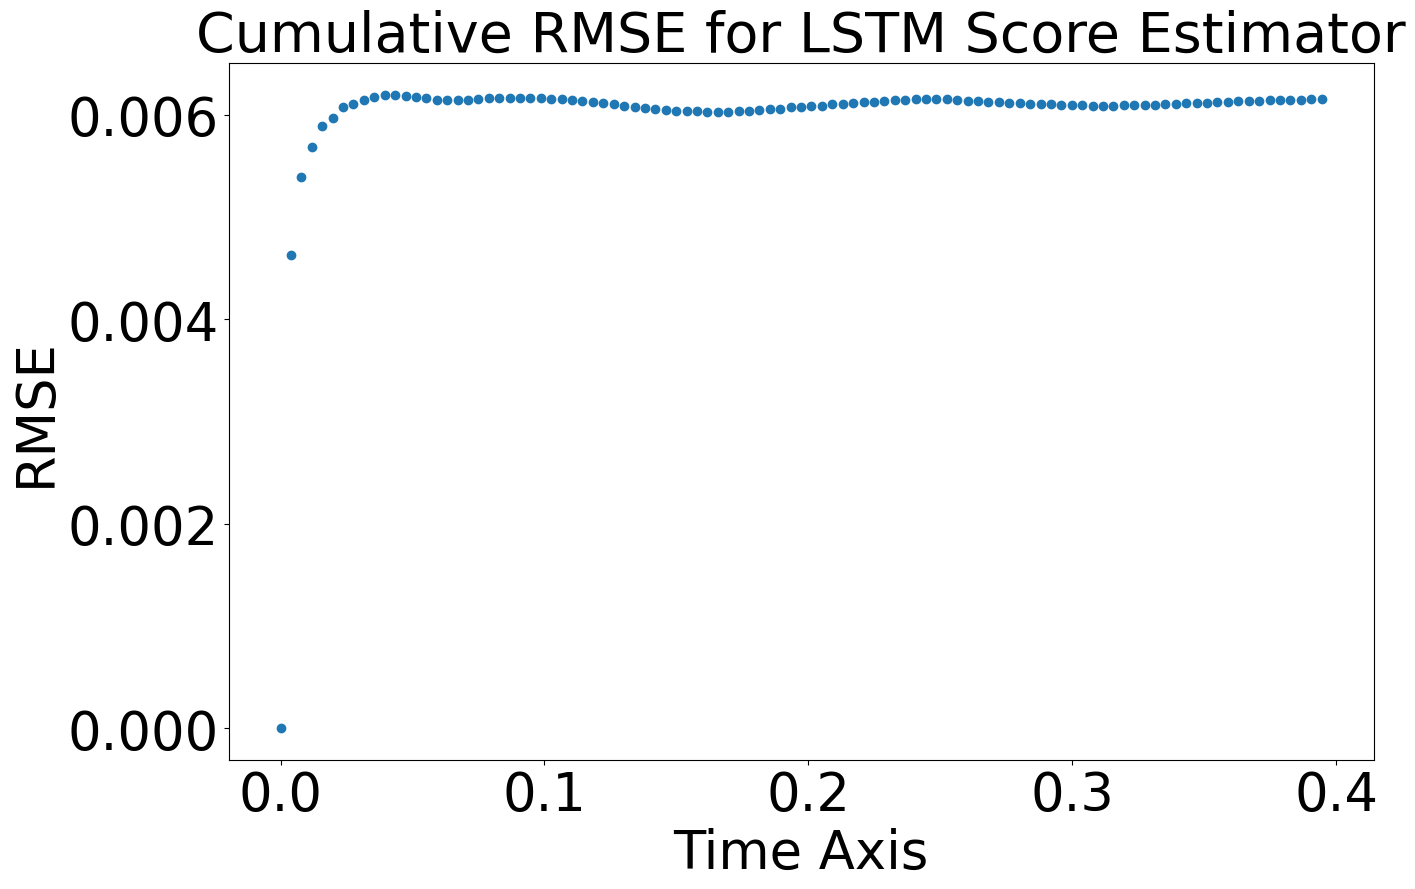

Final time cumulative RMSE local-time error 0.006149309644874653 at Nepoch 960



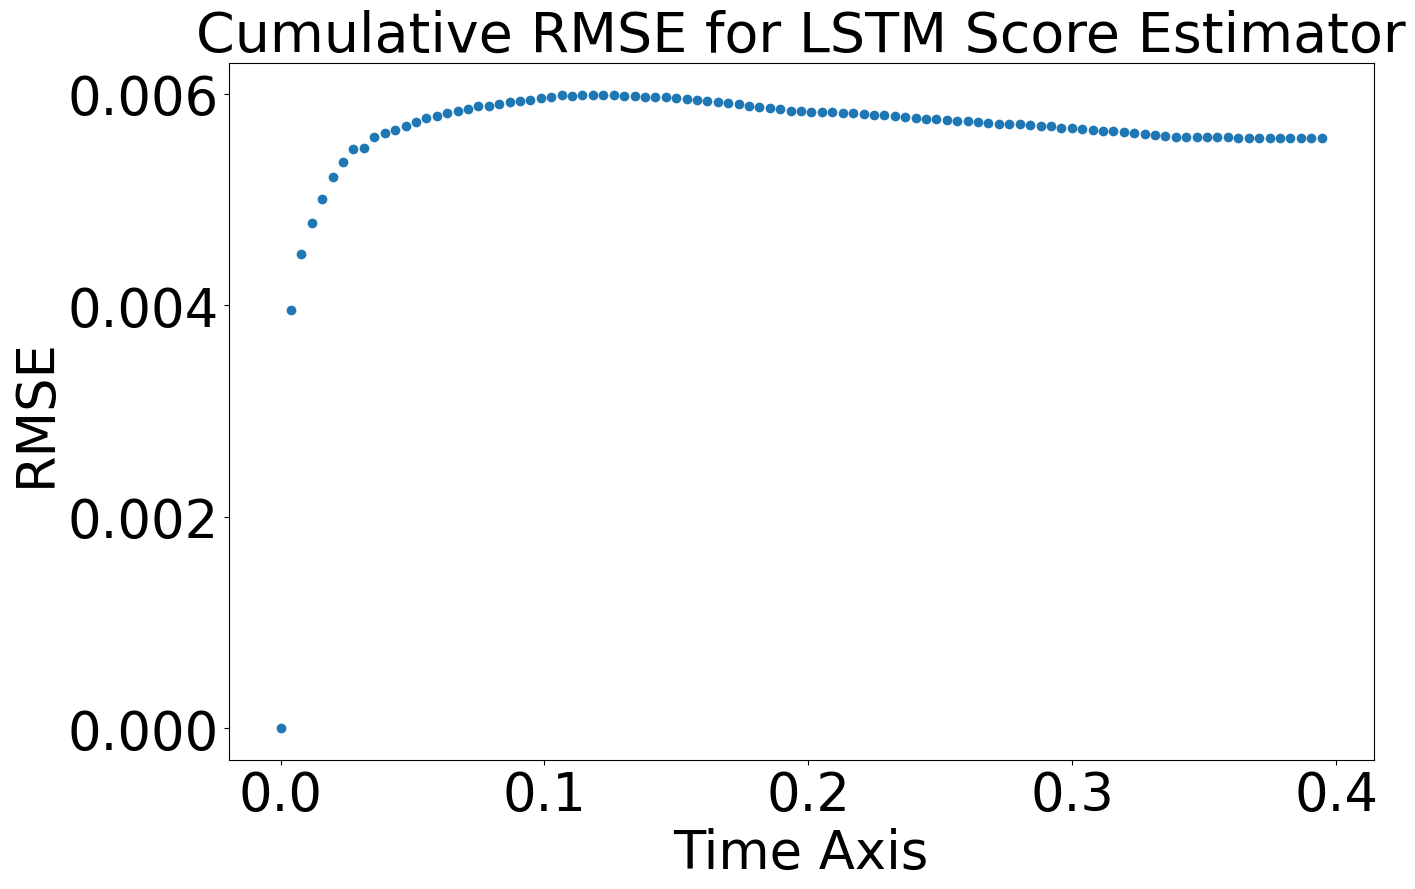

Final time cumulative RMSE local-time error 0.005581733510982432 at Nepoch 1440



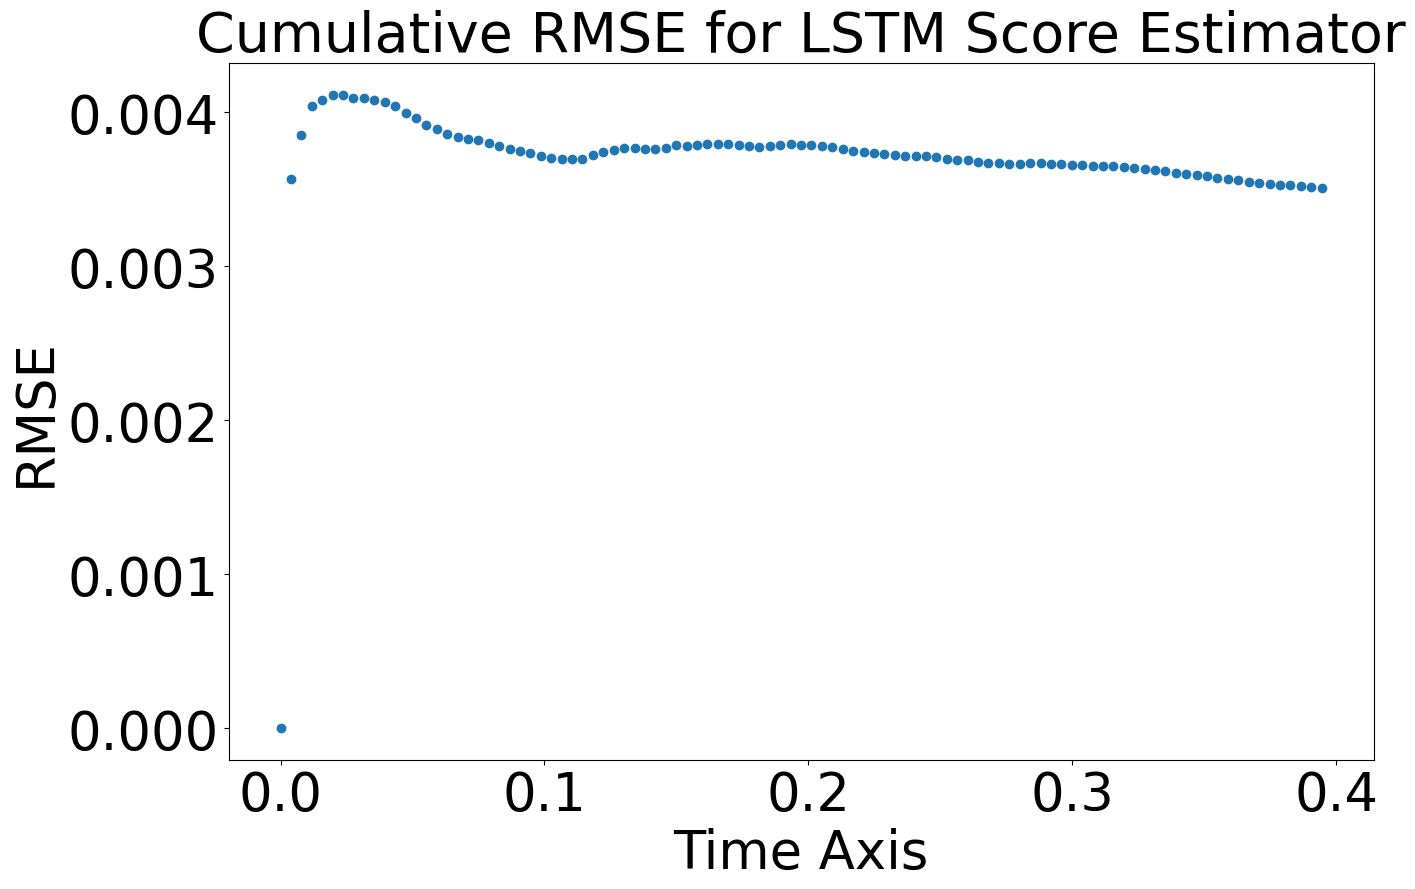

Final time cumulative RMSE local-time error 0.0035078245804438797 at Nepoch 1920



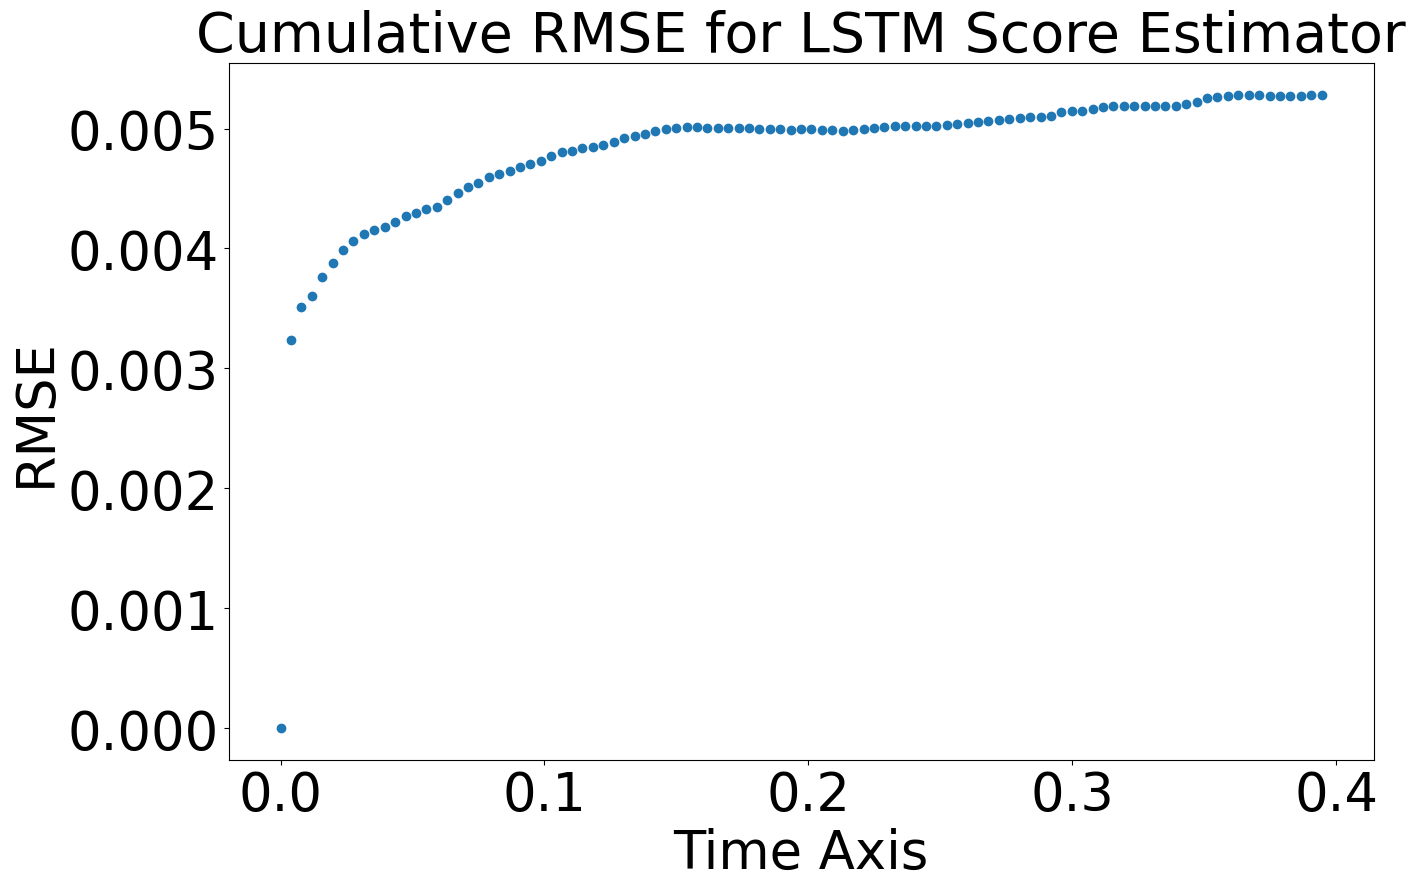

Final time cumulative RMSE local-time error 0.00527911575064818 at Nepoch 2920



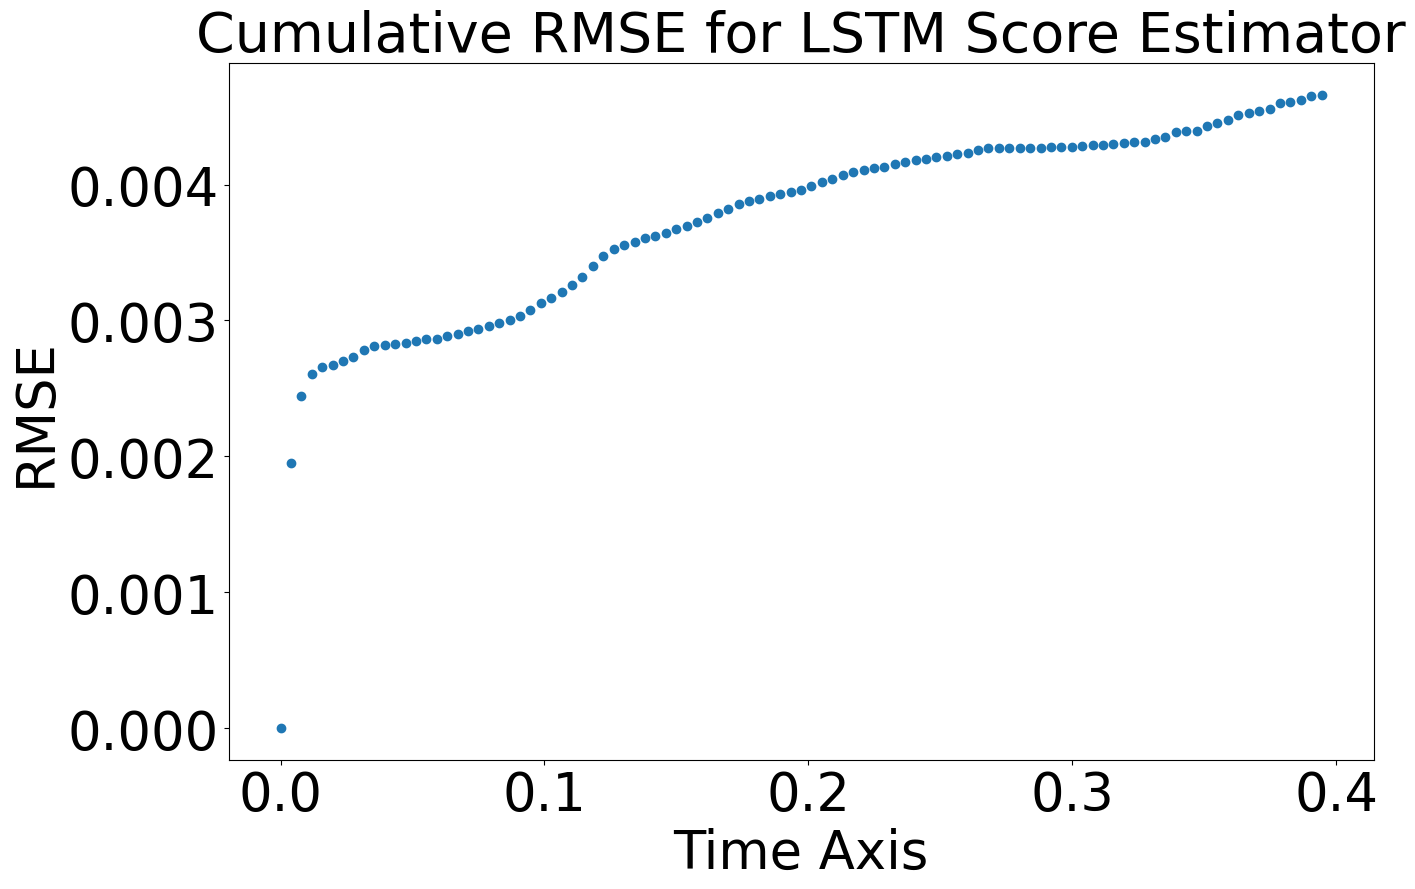

Final time cumulative RMSE local-time error 0.004661217686023878 at Nepoch 6920



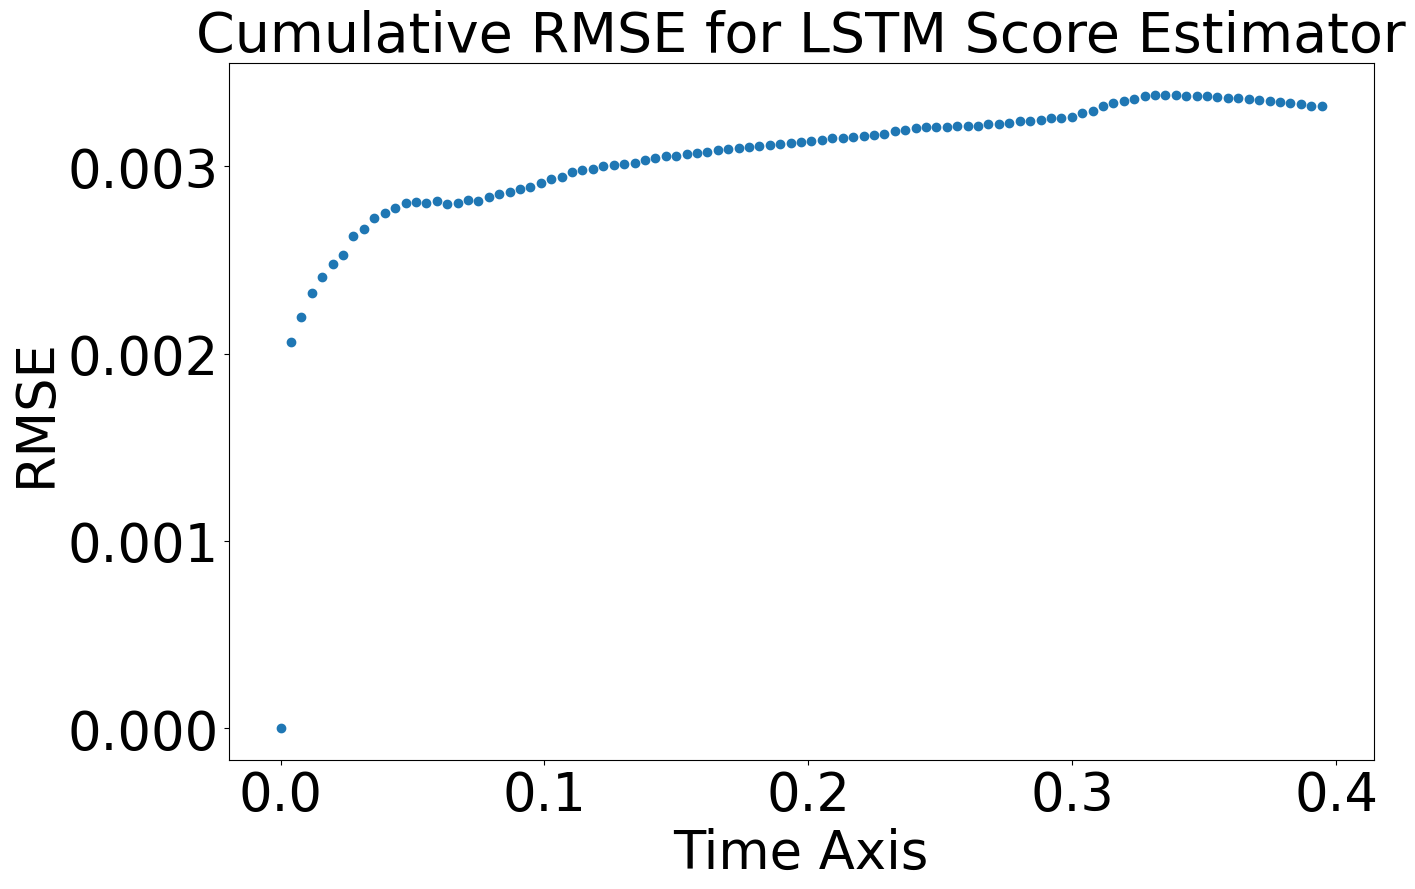

Final time cumulative RMSE local-time error 0.0033195539758295667 at Nepoch 7190



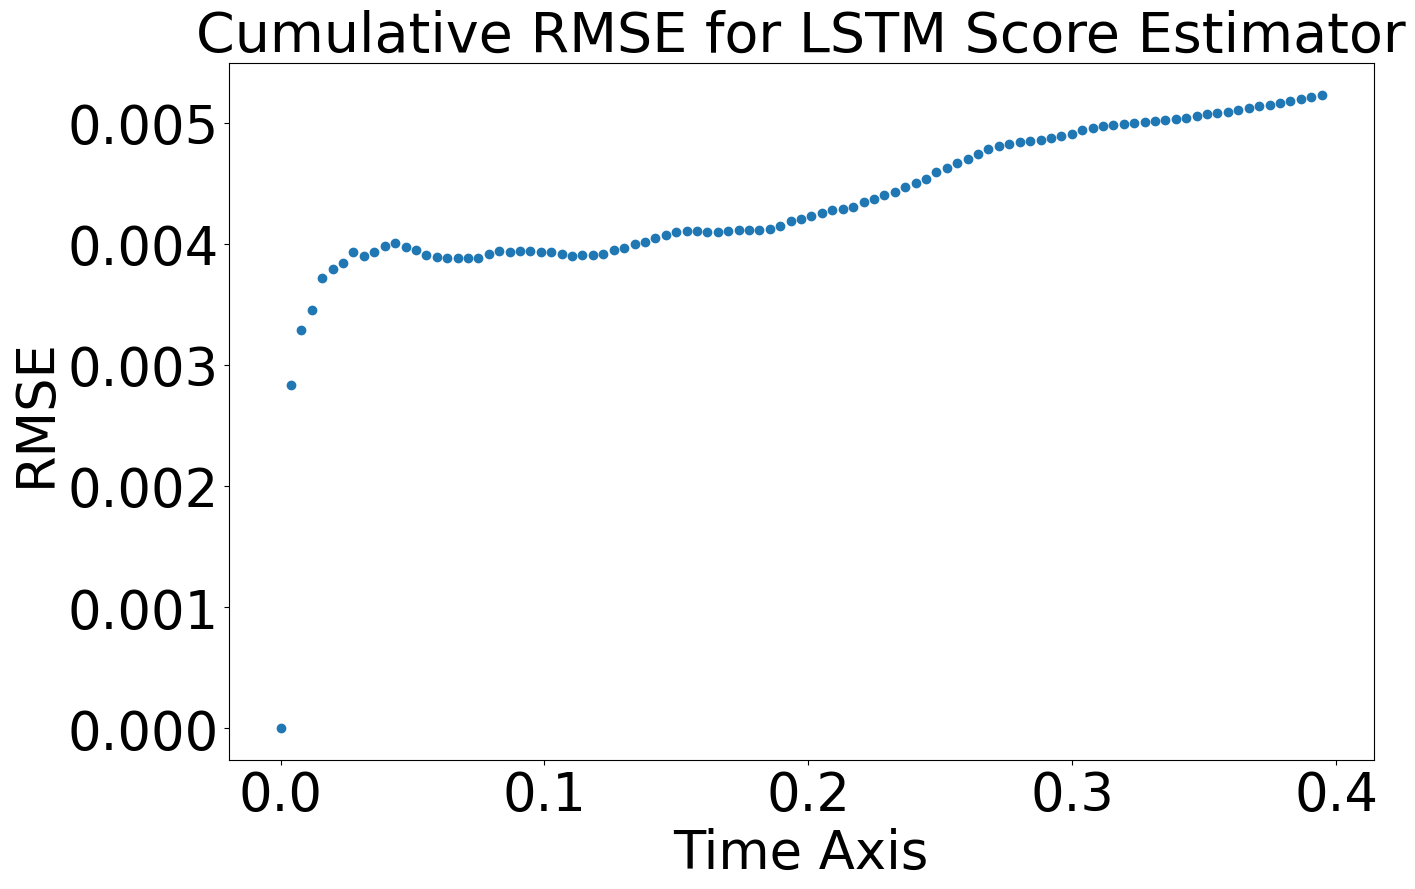

Final time cumulative RMSE local-time error 0.005233045598916774 at Nepoch 8190



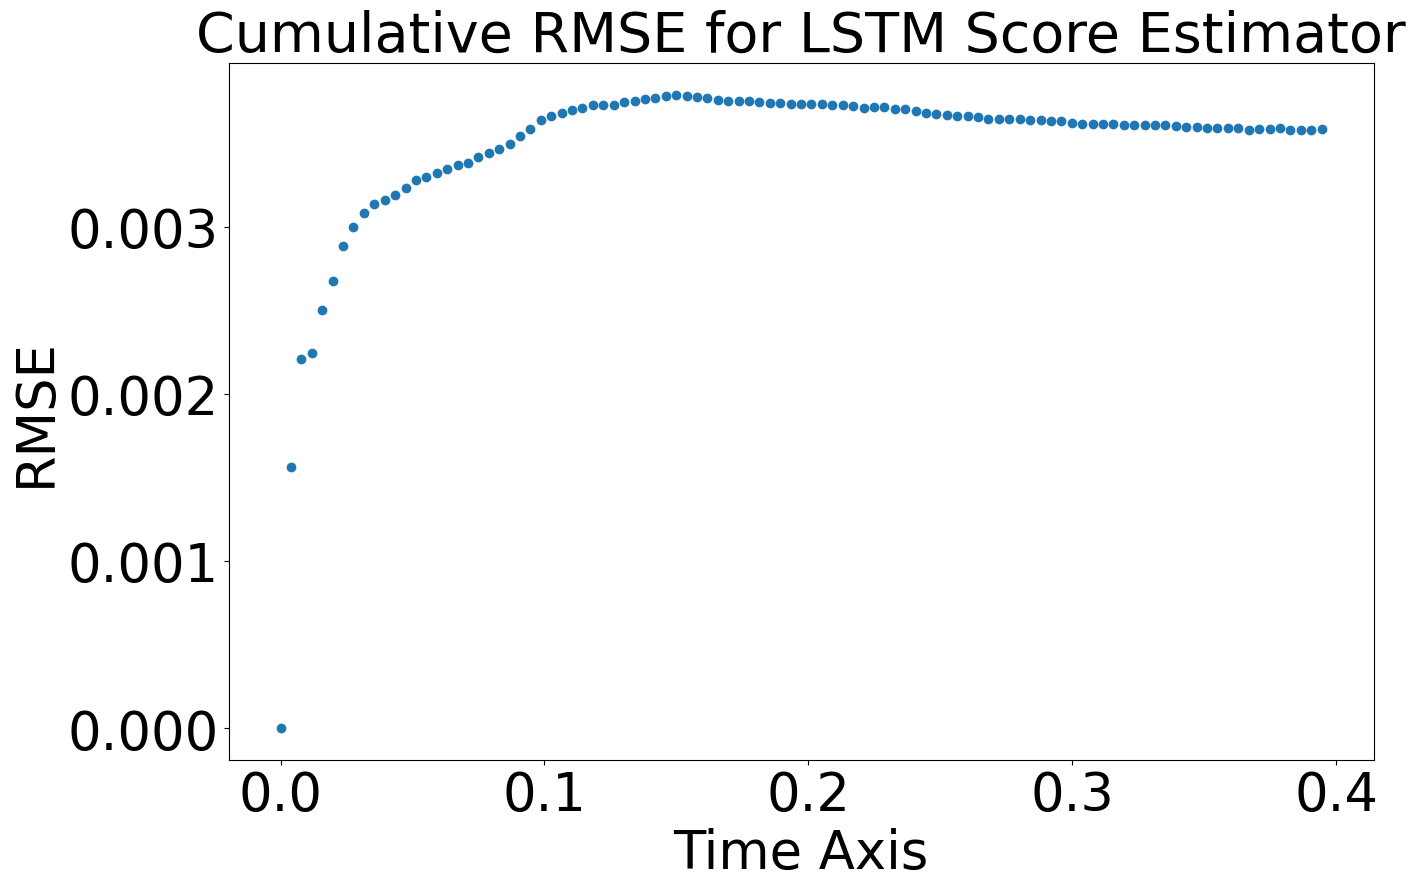

Final time cumulative RMSE local-time error 0.003580369933533045 at Nepoch 12920



In [8]:
for epoch in config.max_epochs:
    try:
        plot_errors(config=config, Nepoch=epoch)
    except FileNotFoundError:
        continue